<a href="https://colab.research.google.com/github/yibesh/Classification-/blob/main/Iris_classfication_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
%matplotlib inline

# Load the Dataset

In [ ]:
#df=pd.read_csv("IRIS.csv")

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Let's have a look on the shape of the dataset:

In [ ]:
df.shape

(150, 5)

# Explore the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Check if there is a missing value

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Descriptive Statistics:
Descriptive statistics are a collection of quantitative measures that summarize and describe the main characteristics of a dataset.

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Count the number of data in each class

In [ ]:
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

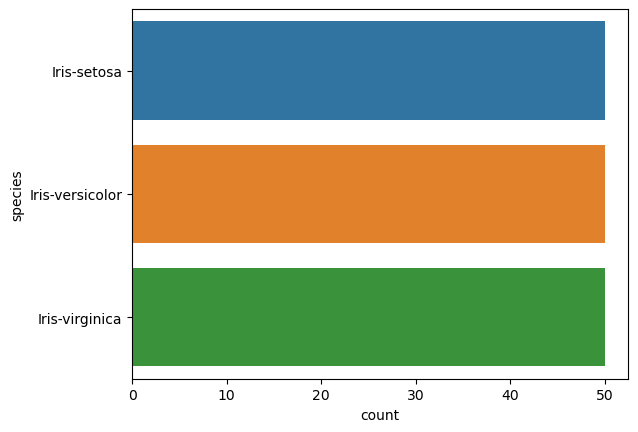

In [ ]:
sns.countplot(y="species",data=df)
plt.show()

# Plot the data based on diffrent attributes

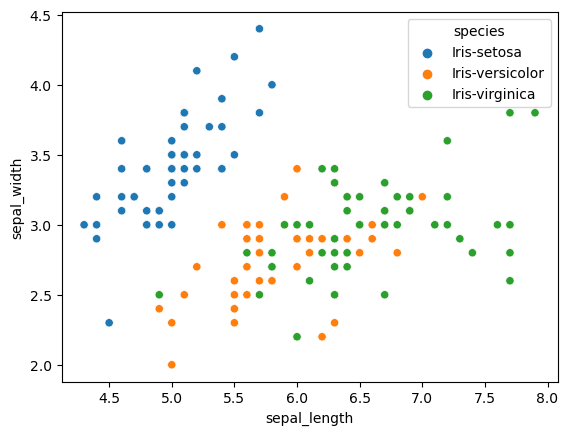

In [ ]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width",hue="species")
plt.show()

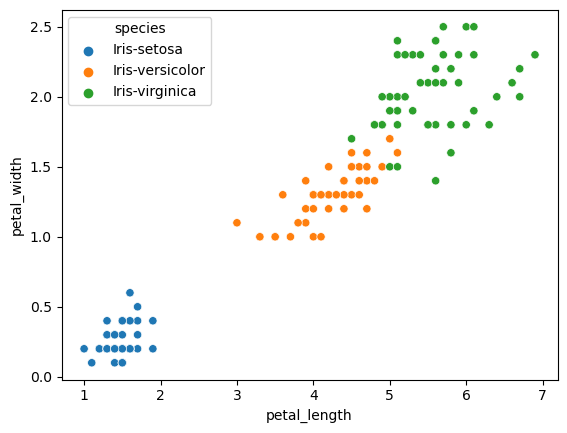

In [ ]:
sns.scatterplot(data=df, x="petal_length", y="petal_width",hue="species")
plt.show()

# Preprocess and Data Normalization

In [ ]:
df["species"]=df["species"].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
label_name=["Iris-setosa","Iris-versicolor","Iris-virginica"]

# Split the training and target data


In [ ]:
#Lets make X and y in our Data:
X=df.drop(columns="species",axis=1)  #Training data
y=df["species"]   #target data

In [ ]:
y.shape

(150,)

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

# Train_test_split the Data:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train)

120

In [ ]:
len(X_test)

30

# Call, Train and Predict the Model:

# KNN Model

In [ ]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score



In [ ]:
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)



In [ ]:
# Fitting the model
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

# Predicting the Test set results

In [ ]:
# Predicting the Test set results
pred1 = classifier.predict(X_test)
print(pred1)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


# The Actual (true) value

In [ ]:
print(y_test)

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: species, dtype: int64


# Evaluating KNN prediction Model

In [ ]:
# Evaluating KNN prediction Model

accuracy = accuracy_score(y_test, pred1)
print('Accuracy of our KNN model is equal ',  accuracy)

Accuracy of our KNN model is equal  1.0


# Confusion Matrix

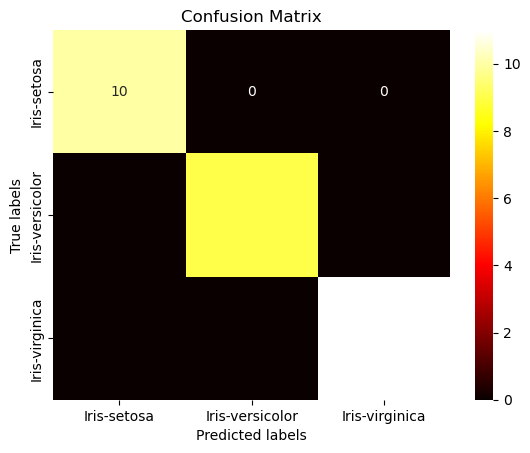

In [ ]:
cf=confusion_matrix(y_test,pred1)
sns.heatmap(cf,annot=True,fmt="d",cmap="hot",xticklabels=label_name,yticklabels=label_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Classification Report

In [ ]:
print(classification_report(y_test,pred1,target_names=label_name))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
def plot_elbow_method(X_train, X_test, title, color='blue'):
    acc = []
    err = []
    ks = list(range(1, 100, 2))

    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k,algorithm="auto")
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        error = np.mean(y_pred != y_test)
        err.append(error)
        acc.append(accuracy)

    plt.figure()
    plt.title(title)
    plt.xlabel("Number of Ks")
    plt.ylabel("Accuracy/Error")
    plt.plot(ks, acc, label='Accuracy', color='blue')
    #plt.plot(ks, err, label='Error', color='red')
    plt.legend()
    plt.show()

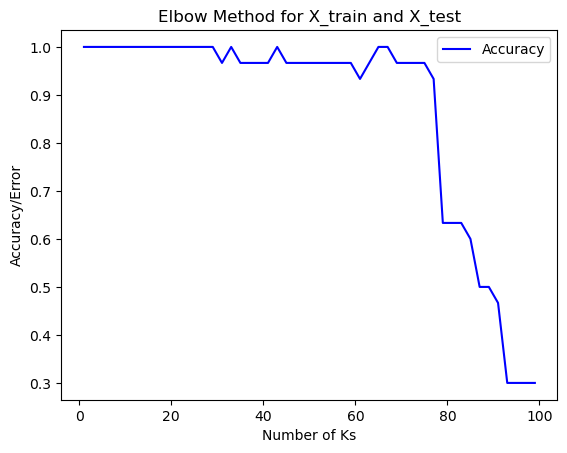

In [ ]:
plot_elbow_method(X_train, X_test, "Elbow Method for X_train and X_test")

# SVM

In [ ]:
from sklearn.svm import SVC # support vector classifier
svm_model = SVC()
# also : SVR:  support vector regressor

In [ ]:
svm_model.fit(X_train,y_train)
pred2=svm_model.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred2)}")

Accuracy Score : 1.0


# Tune parameters

# 1. Regularization (C)

In [ ]:
svm_model= SVC(C=10)
svm_model.fit(X_train, y_train)
pred2=svm_model.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred2)}")

Accuracy Score : 1.0


In [ ]:
svm_model = SVC(C=0.01) #hypermeter
svm_model.fit(X_train, y_train)
pred2=svm_model.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred2)}")


Accuracy Score : 0.3


# 2. Gamma

In [ ]:
svm_model = SVC(gamma=5)
svm_model.fit(X_train, y_train)
pred2=svm_model.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred2)}")

Accuracy Score : 1.0


# 3. Kernel (linear, radial basis function (RBF), polynomial, and Sigmoid kernel)¶

In [ ]:
svm_model_Ker = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(gamma=5)

In [ ]:
pred2=svm_model.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred2)}")

Accuracy Score : 1.0


In [ ]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)

pred2=model_rbf.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred2)}")

Accuracy Score : 1.0


In [ ]:
model_Polynomial = SVC(kernel='poly')
model_Polynomial.fit(X_train, y_train)

pred2=model_Polynomial.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred2)}")

Accuracy Score : 1.0


In [ ]:
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(X_train, y_train)

pred2=model_sigmoid.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred2)}")


Accuracy Score : 0.3


# Choose all the best prameters

In [ ]:
# Create a kernel support vector machine model
svm_model = SVC(kernel='rbf', gamma=5, C=10.0)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Evaluate the model on the test data
pred2=svm_model.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred2)}")

Accuracy Score : 1.0


# confusion matrix

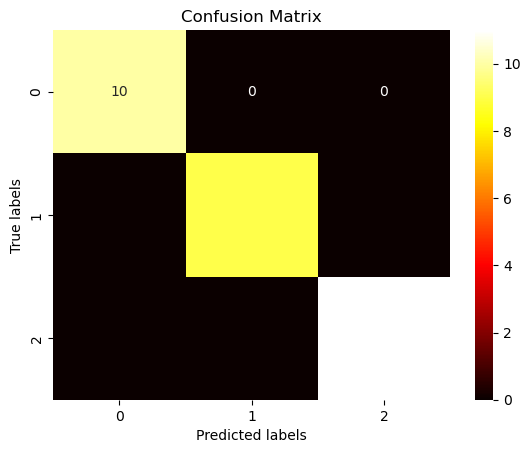

In [ ]:

cf=confusion_matrix(y_test,pred2)
sns.heatmap(cf,annot=True,fmt="d",cmap="hot",xticklabels=label_name,yticklabels=label_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# classification report

In [ ]:
print(classification_report(y_test,pred2,target_names=label_name))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Decsion Tree

In [ ]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Defining an object for DTC and fitting for train dataset
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

In [ ]:
y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [ ]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.95
Accuracy of Decision Tree-Test:  0.9666666666666667


In [ ]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=4)  #by changing the number of estimators or tree we can imporve the perfromance
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4)

In [ ]:
#prediction of unseen data
pred3=rf_model.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred3)}")

Accuracy Score : 1.0


In [ ]:
#prediction of unseen data

print("the predicted values are:", pred3)

the predicted values are: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


# Confusion matrix

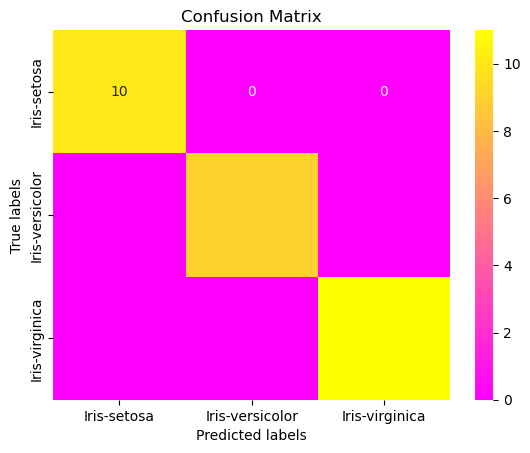

In [ ]:
cf=confusion_matrix(y_test,pred2)
sns.heatmap(cf,annot=True,fmt="d",cmap="spring",xticklabels=label_name,yticklabels=label_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Classification report

In [ ]:
print(classification_report(y_test,pred3,target_names=label_name))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

